In [1]:
import torch
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt


In [11]:
hist_pred = torch.load('exp_result/nursery/trained_models\orginal/historical_clients_pred.pkl')
# print('hist_pred:', hist_pred, '\n', np.array(hist_pred).shape)
# hist_pred has 4 dimensions: [epoch, num_parties, num_samples, num_features], use next epoch pred to subtract current epoch pred to get the delta, wich has 4 dimensions: [epoch, num_parties, num_samples, num_features],but the number of epoch is 1 less than the number of hist_pred
hist_pred = torch.tensor(hist_pred)
delta = hist_pred.diff(dim=0)
# print('delta:', delta, '\n', np.array(delta).shape)
delta = delta.numpy()
# sum delta's second dimension and divede to get the average distributed percent
delta_sum_by_party = np.sum(delta, axis=1, keepdims=True)
delta_sum_by_party[np.where(np.abs(delta_sum_by_party) < 1e-6)] = np.nan
# # print('delta_sum_by_party:', delta_sum_by_party, '\n', np.array(delta_sum_by_party).shape)
org_delta_distribution = delta / delta_sum_by_party
print('delta_distribution:', org_delta_distribution, '\n', np.array(org_delta_distribution).shape)

delta_distribution: [[[[ 2.48177938e-01  1.99293134e-01  1.25031803e-01 -8.56301859e+00
     3.77842230e+00]
   [ 1.20285368e-01 -6.57905287e+00  5.52731832e-02  1.12426702e+00
     4.14712057e-01]
   [ 7.95976851e-01  3.40610260e-01 -8.40589975e-02  1.23110881e-01
     5.23153831e-01]
   ...
   [ 6.97516547e-01  4.38897722e-01 -6.49392359e-01 -1.74030851e-01
     2.36704252e-01]
   [ 1.89974345e+00  7.81505738e-02 -6.10172014e-01  4.21412673e-01
    -2.19775159e+00]
   [ 1.40490858e-01  3.87594854e-01 -5.49145953e-02 -6.92154956e-01
     2.16417457e+00]]

  [[ 1.80227327e-01 -3.13426356e-01  4.88628373e-01 -9.31985410e+00
     2.49377129e+00]
   [ 1.03181029e-01 -8.25963888e+00  2.26745763e-01 -2.55959641e-01
    -5.05203915e-01]
   [-4.93861030e-01 -3.67120061e-02 -1.34544774e-01  2.29186543e-01
     2.12068071e-02]
   ...
   [-4.17928741e-01 -1.63771631e-01  4.88527848e-01  5.70595496e-01
     2.91241741e-01]
   [ 7.54423835e-01  1.56694530e-01  6.70619354e-01 -1.12597624e-01
     5

epoch: 90
              0         1
72    -0.040983  0.040980
247   -0.040993  0.040990
502   -0.041013  0.041011
592   -0.040834  0.040832
649   -0.040721  0.040717
...         ...       ...
33255 -0.040989  0.040988
33451 -0.040826  0.040824
33733 -0.040937  0.040934
33832 -0.041064  0.041062
34002 -0.040721  0.040720

[183 rows x 2 columns]


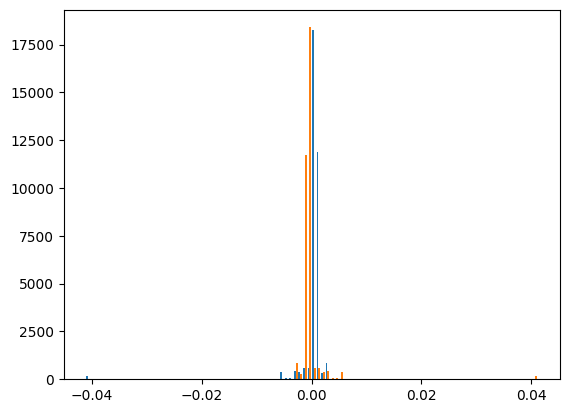

In [200]:
for _ in [90]:#range(delta_sum_by_party.shape[0]):
    print('epoch:', _)
    update = pd.DataFrame(delta_sum_by_party[_].squeeze())
    # print(update.describe())
    # print where update is larger than 0.1, print the index
    print(update[abs(update) > 0.02].dropna(how='all'))
    # print where update is smaller than -0.1, print the index
    # print(update[update < -0.1].dropna(how='all').index)
    plt.hist(update, bins=100)
    plt.show()

In [201]:
index = update[abs(update) > 0.02].dropna(how='all').index
org_df = pd.read_csv('E:\machine unlearning\Code\share_dataset\Income/adult.csv')
y = org_df['income'].values
y = np.where(y == '<=50K', 0, 1)
org_df = org_df.drop(columns=['income'])
org_df['y'] = y
print(org_df.describe())
print(org_df.loc[index].describe())

                age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week             y  
count  48842.000000    48842.000000  48842.000000  
mean      87.502314       40.422382      0.239282  
std      403.004552       12.391444      0.426649  
min        0.000000        1.000000      0.000000  
25%        0.000000       40.000000      0.000000  
50%        0.000000       40.000000      0.000000  
75%        0.000000    

In [238]:
org_df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,y
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [244]:
overall_pred = hist_pred.numpy()[90,:,:,:].sum(axis=0)
print(pd.DataFrame(overall_pred[index]).describe())
non_index = np.delete(np.arange(0, overall_pred.shape[0]), index)
print(pd.DataFrame(overall_pred[non_index]).describe())

                0           1
count  183.000000  183.000000
mean   -13.731943   16.030790
std      1.155792    1.096026
min    -15.404348   11.964340
25%    -14.540450   15.440938
50%    -14.121607   16.338642
75%    -13.386363   16.811175
max    -10.430750   17.896546
                  0             1
count  33970.000000  33970.000000
mean       2.320650      0.012758
std        1.475032      1.522716
min       -4.937276     -5.871340
25%        1.018994     -0.958836
50%        2.656036     -0.054865
75%        3.573192      1.017801
max        7.256075      7.057929


In [229]:
overall_pred1 = hist_pred.numpy()[0,:,:,:].sum(axis=0)
print(pd.DataFrame(overall_pred1[index]).describe())
print(pd.DataFrame(overall_pred1[non_index]).describe())

                0           1
count  183.000000  183.000000
mean    -0.974840    3.273815
std      1.350618    1.194740
min     -2.962324   -1.424758
25%     -1.822420    2.580505
50%     -1.484913    3.688979
75%     -0.581152    4.133264
max      2.712039    5.043164
                  0             1
count  33970.000000  33970.000000
mean       2.268428      0.065110
std        1.552271      1.529994
min       -1.673526     -5.846935
25%        0.736131     -0.970099
50%        2.770319     -0.020591
75%        3.603201      1.182317
max        6.267767      5.096215


In [ ]:
for party in range(org_delta_distribution.shape[1]):
    print('party:', party)
    distribution6 = org_delta_distribution[90, party,:,:]
    print(pd.DataFrame(distribution6[index]).describe())
    print(pd.DataFrame(distribution6[non_index]).describe())

party: 0
                0           1
count  183.000000  183.000000
mean    -0.007224   -0.007226
std      0.014272    0.014273
min     -0.054676   -0.054680
25%     -0.003405   -0.003406
50%     -0.003068   -0.003069
75%     -0.002279   -0.002282
max     -0.000720   -0.000722
                  0             1
count  33970.000000  33970.000000
mean       0.752750      0.719239
std        9.954228     11.100711
min    -1183.930818  -1533.637475
25%        0.129829      0.129870
50%        0.218882      0.218859
75%        0.381524      0.381320
max      768.157480    738.369915
party: 1
                0           1
count  183.000000  183.000000
mean     0.029230    0.029230
std      0.032191    0.032192
min     -0.053051   -0.053055
25%      0.044058    0.044059
50%      0.044313    0.044313
75%      0.044455    0.044455
max      0.044872    0.044872
                  0             1
count  33970.000000  33970.000000
mean      -0.496981     -0.326534
std       37.141348     39.341119


party: 0


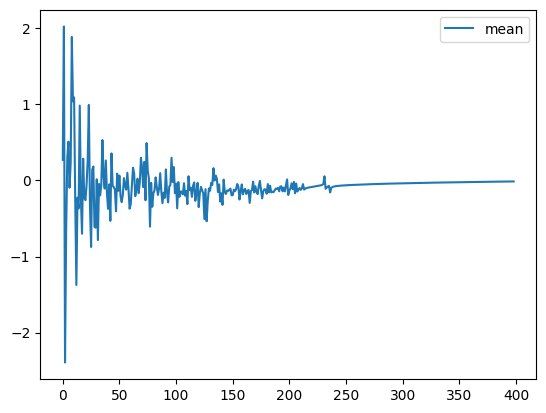

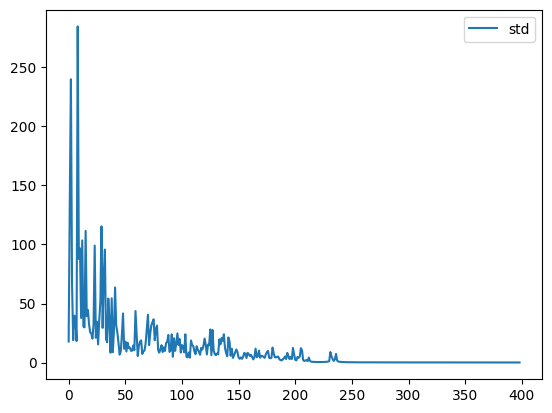

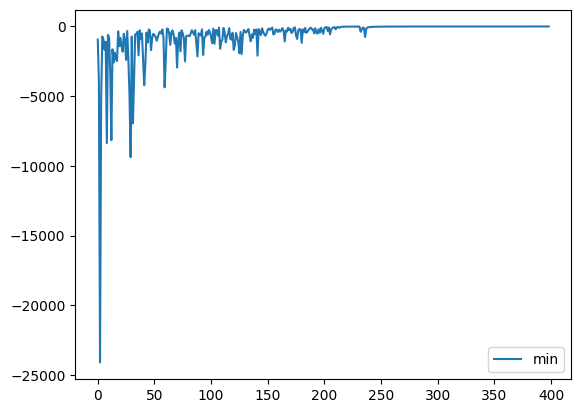

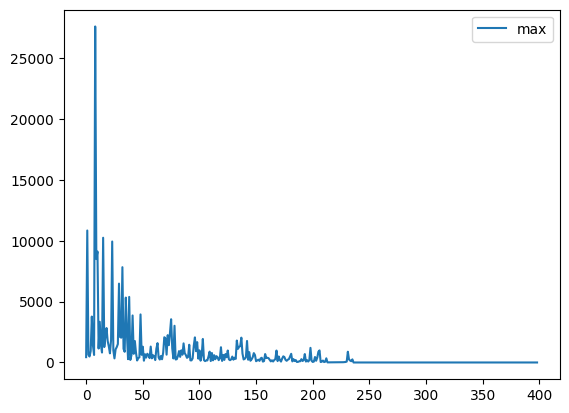

party: 1


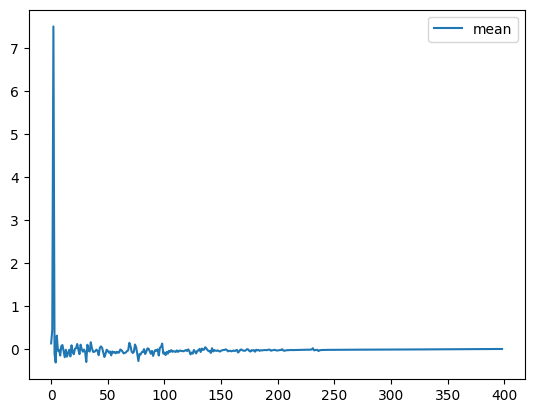

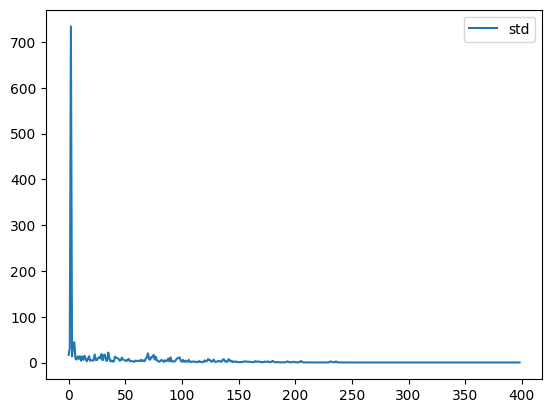

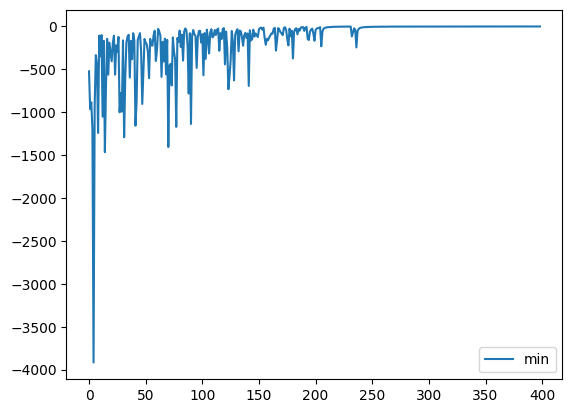

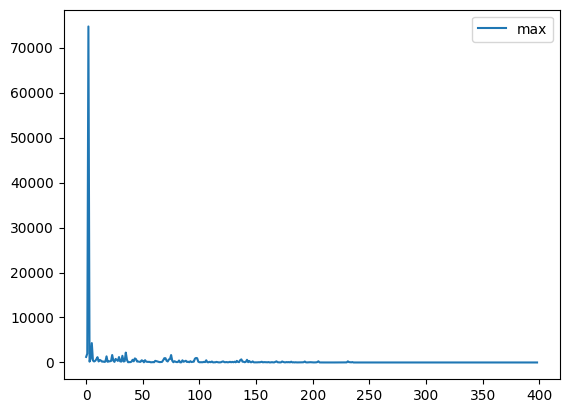

party: 2


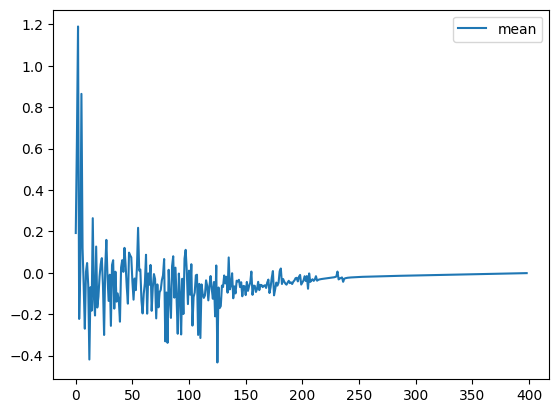

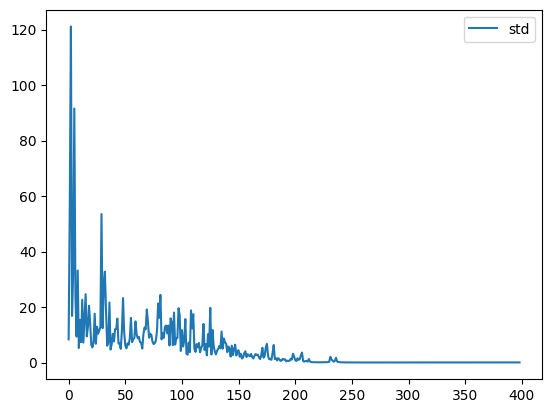

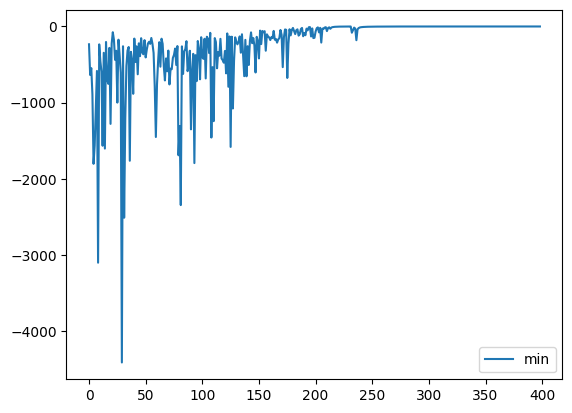

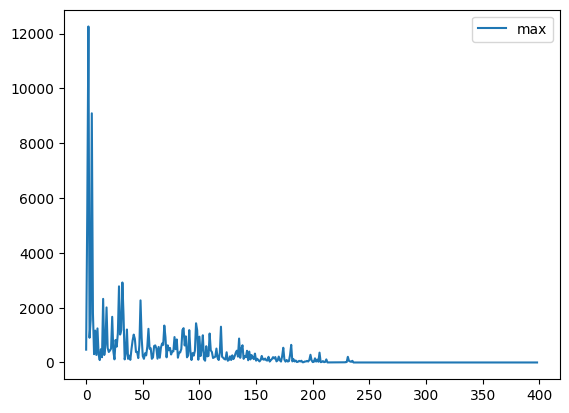

party: 3


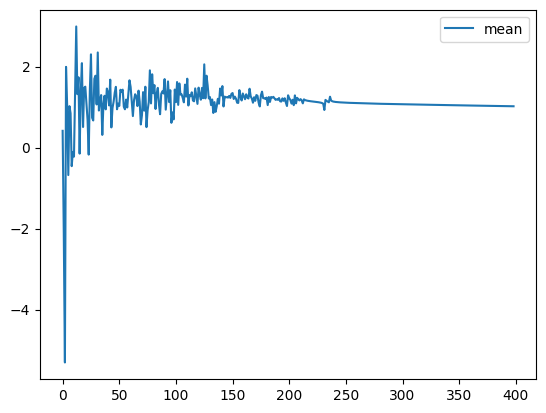

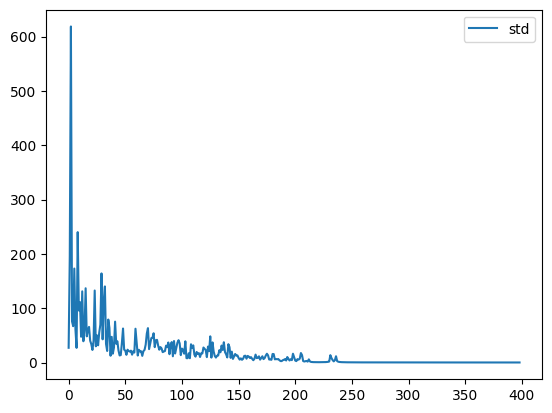

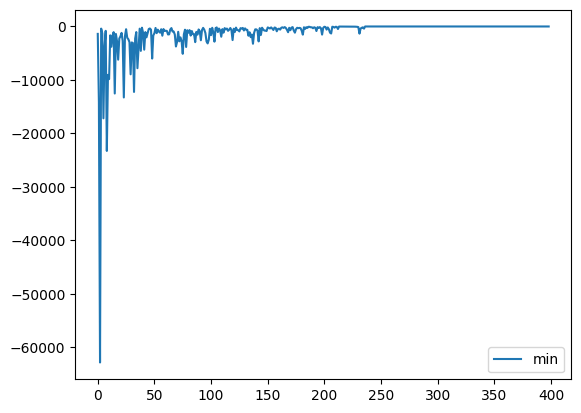

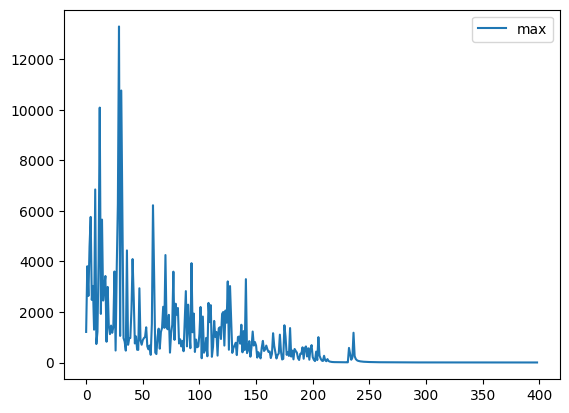

In [12]:
for _ in range(org_delta_distribution.shape[1]):
    print('party:', _)
    draw_data = []
    for i in range(len(org_delta_distribution)):
        distribution = org_delta_distribution[i,:,:,0]
        distribution = pd.DataFrame(distribution).T
        # print(i)
        # print(distribution.describe())
        # print(distribution.describe().loc['mean'][_])
        draw_data.append([distribution.describe().loc['mean'][_], distribution.describe().loc['std'][_], distribution.describe().loc['min'][_], distribution.describe().loc['max'][_]])
    #draw mean
    draw_data = np.array(draw_data)
    plt.plot(draw_data[:,0], label='mean')
    # plt.fill_between(range(len(draw_data)), draw_data[:,0]-draw_data[:,1], draw_data[:,0]+draw_data[:,1], alpha=0.3)
    plt.legend()
    plt.show()
    plt.plot(draw_data[:,1], label='std')
    plt.legend()
    plt.show()
    plt.plot(draw_data[:,2], label='min')
    plt.legend()
    plt.show()
    plt.plot(draw_data[:,3], label='max')
    plt.legend()
    plt.show()


                  0             1             2             3
count  10368.000000  10368.000000  10368.000000  10368.000000
mean      -0.012822     -0.006235     -0.001722      1.020780
std        0.141523      0.126818      0.089765      0.189856
min       -0.875519     -0.756606     -0.572829      0.617903
25%       -0.107426     -0.074717     -0.034424      0.905272
50%       -0.000083     -0.004022      0.002112      0.994984
75%        0.085336      0.071307      0.042418      1.099702
max        0.471532      0.369238      0.373878      3.104070


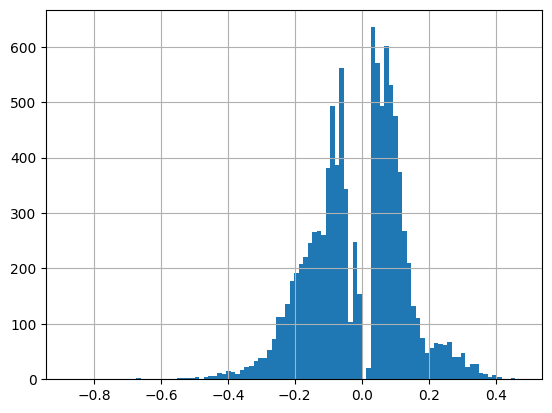

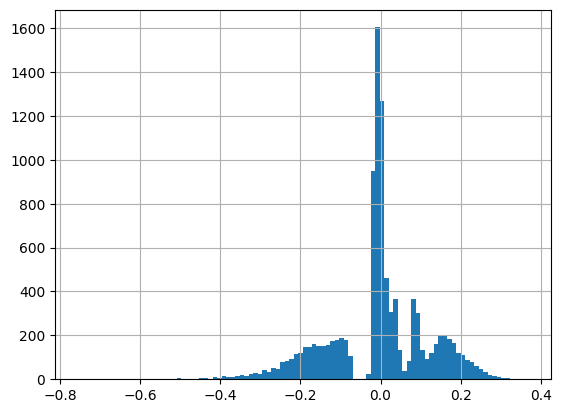

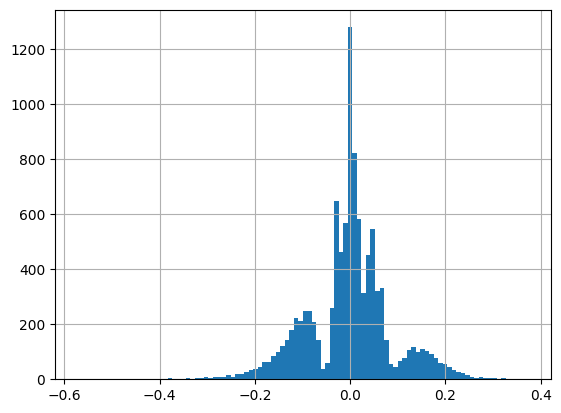

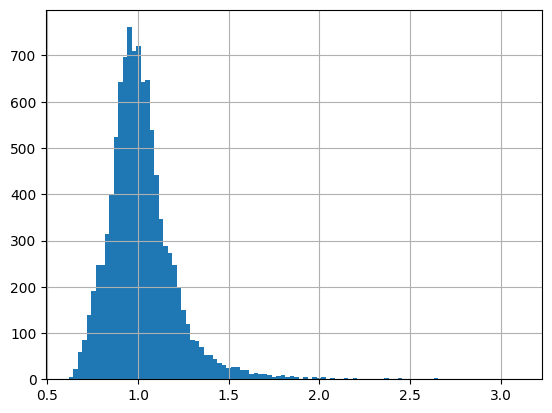

In [13]:
distribution1 = org_delta_distribution[-1,:,:,0]
distribution2 = org_delta_distribution[-2,:,:,0]
distribution3 = org_delta_distribution[-3,:,:,0]
distribution4 = org_delta_distribution[-4,:,:,0]
distribution5 = org_delta_distribution[-5,:,:,0]
distribution = 1 / 5 * (distribution1 + distribution2 + distribution3 + distribution4 + distribution5)
# distribution = finetune_delta_distribution[3,:,:,0]
distribution = pd.DataFrame(distribution).T
print(distribution.describe())
for i in range(distribution.shape[1]):
    distribution.iloc[:,i].hist(bins=100)
    plt.show()

In [ ]:
asyn_pred = torch.load('exp_result/adult_income/trained_models/random_remove_0.02_features_Asynchronous_Unlearning/historical_clients_pred.pkl')
asyn_pred = np.array(asyn_pred)
# some of the data in asyn_pred is [], fill it with 0
for i in range(asyn_pred.shape[0]):
    for j in range(asyn_pred.shape[1]):
        if asyn_pred[i,j] == []:
            asyn_pred[i,j] = np.zeros(asyn_pred[0,0].shape)
asyn_pred = torch.tensor(asyn_pred)



C:\Users\PC\AppData\Local\Temp\ipykernel_7148\369752716.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(asyn_pred)


array([[array([[-0.56053758,  0.37038624],
               [ 1.25046241, -0.04729694],
               [ 0.05976561, -0.34652063],
               ...,
               [ 0.35613334, -0.18127111],
               [ 0.1726248 ,  0.23788542],
               [-0.0693616 , -0.08302655]]), array([], dtype=float64),
        array([[ 0.08944218, -0.08944756],
               [ 0.08944218, -0.08944756],
               [ 0.08944218, -0.08944756],
               ...,
               [ 0.11573376, -0.21945766],
               [ 0.08944218, -0.08944756],
               [ 0.08944218, -0.08944756]]),
        array([[ 0.16731744,  0.42460221],
               [ 0.16731744,  0.42460221],
               [-0.51159996, -1.09756041],
               ...,
               [ 0.08944218, -0.08944756],
               [ 0.08944218, -0.08944756],
               [ 0.08944218, -0.08944756]]),
        array([[ 1.10289502,  0.57250577],
               [ 1.10289502,  0.57250577],
               [ 0.08944218, -0.08944756],
     

In [3]:
finetune_pred = torch.load('exp_result/diabetes/trained_models/random_remove_0.04_information_Batch_Unlearning/historical_clients_pred.pkl')
# finetune_pred = torch.load('exp_result/adult_income/trained_models/random_remove_0.02_features_Asynchronous_Unlearning/historical_clients_pred.pkl')
# print('hist_pred:', hist_pred, '\n', np.array(hist_pred).shape)
# hist_pred has 4 dimensions: [epoch, num_parties, num_samples, num_features], use next epoch pred to subtract current epoch pred to get the delta, wich has 4 dimensions: [epoch, num_parties, num_samples, num_features],but the number of epoch is 1 less than the number of hist_pred
finetune_pred = torch.tensor(finetune_pred)
finetune_delta = finetune_pred.diff(dim=0)
# print('delta:', delta, '\n', np.array(delta).shape)
finetune_delta = finetune_delta.numpy()
# sum delta's second dimension and divede to get the average distributed percent
finetune_delta_sum_by_party = np.sum(finetune_delta, axis=1, keepdims=True)
finetune_delta_sum_by_party[np.where(np.abs(finetune_delta_sum_by_party) < 1e-6)] = np.nan
finetune_delta_distribution = finetune_delta / finetune_delta_sum_by_party
print('retrain_delta_distribution:', finetune_delta_distribution, '\n', np.array(finetune_delta_distribution).shape)

retrain_delta_distribution: [[[[ 5.48646156e-01  5.48645990e-01]
   [ 7.91915816e-01  7.91915568e-01]
   [ 7.43246672e-01  7.43246490e-01]
   ...
   [ 3.19072840e-01  3.19071703e-01]
   [ 6.14544064e-01  6.14543617e-01]
   [ 7.81770580e-01  7.81770720e-01]]

  [[ 6.94872455e-03  6.94886120e-03]
   [ 3.16497859e-03  3.16504160e-03]
   [ 2.85237685e-03  2.85243369e-03]
   ...
   [ 4.92518282e-01  4.92519209e-01]
   [ 2.49633269e-01  2.49633402e-01]
   [ 5.33219968e-03  5.33230750e-03]]

  [[ 1.77299513e-01  1.77299630e-01]
   [ 1.34979898e-01  1.34980020e-01]
   [ 8.70892990e-02  8.70893792e-02]
   ...
   [ 1.07302142e-01  1.07302344e-01]
   [ 6.61633449e-02  6.61637671e-02]
   [ 1.01733064e-01  1.01732782e-01]]

  [[ 2.67105607e-01  2.67105519e-01]
   [ 6.99393080e-02  6.99393711e-02]
   [ 1.66811652e-01  1.66811697e-01]
   ...
   [ 8.11067354e-02  8.11067433e-02]
   [ 6.96593215e-02  6.96592135e-02]
   [ 1.11164157e-01  1.11164191e-01]]]


 [[[ 5.19207381e-01  5.19203797e-01]
   [ 7.39

C:\Users\PC\AppData\Local\Temp\ipykernel_29476\246925380.py:5: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:248.)
  finetune_pred = torch.tensor(finetune_pred)


party: 0


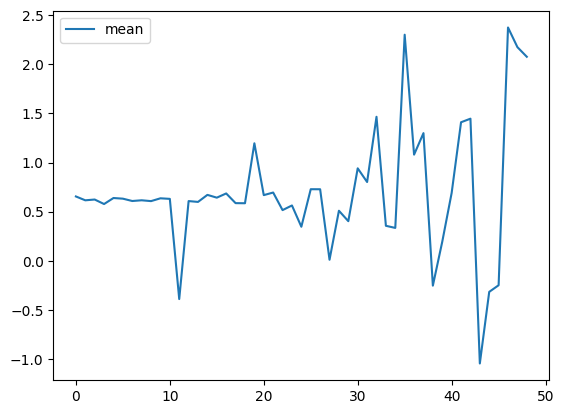

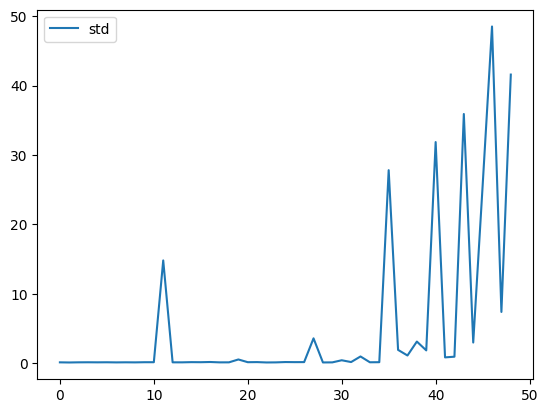

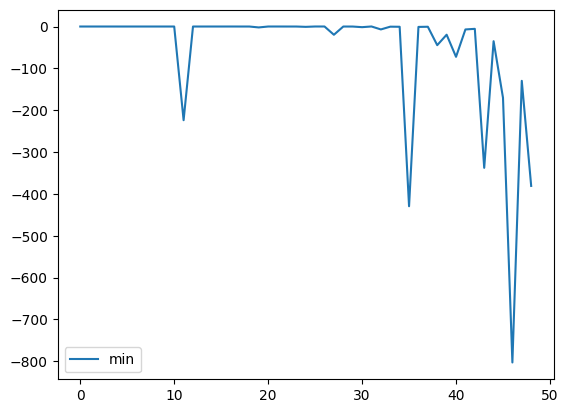

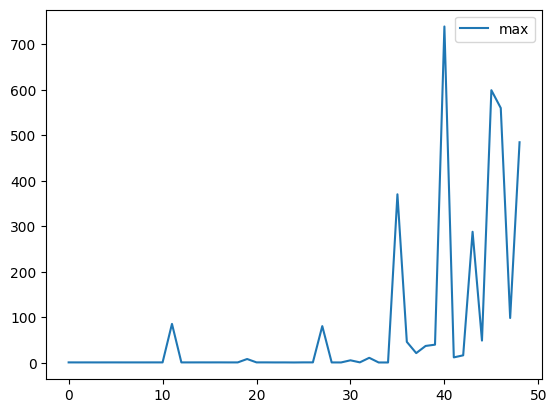

party: 1


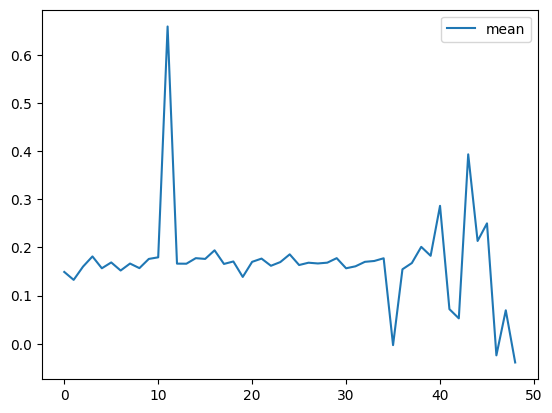

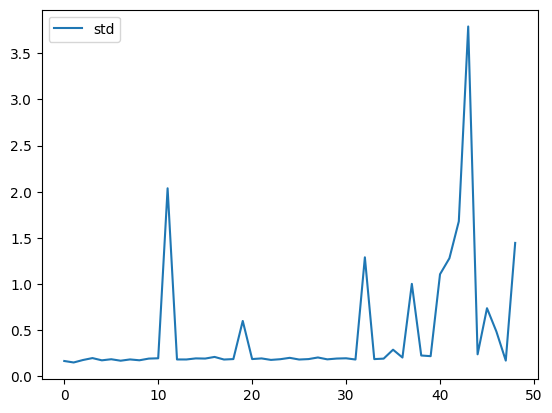

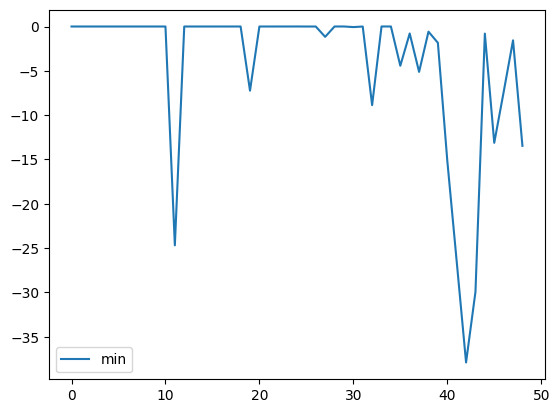

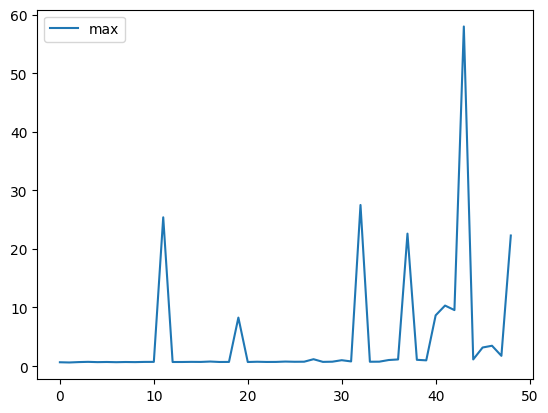

party: 2


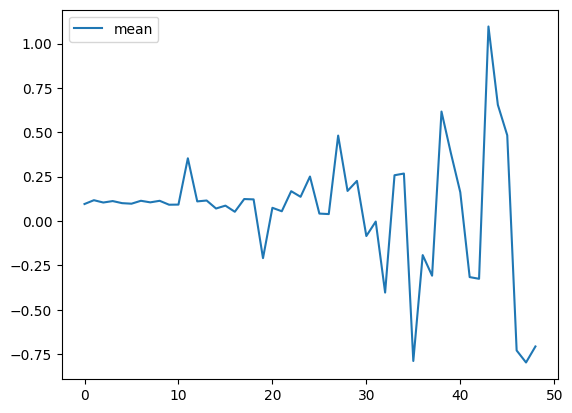

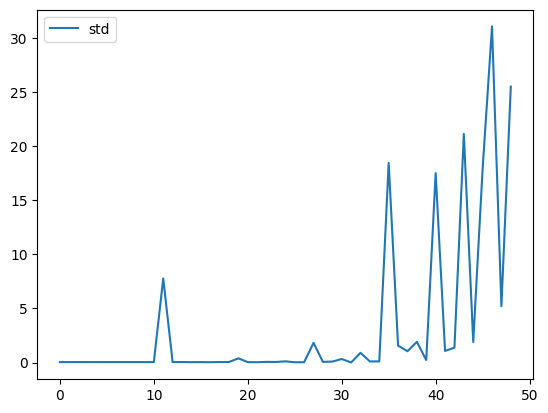

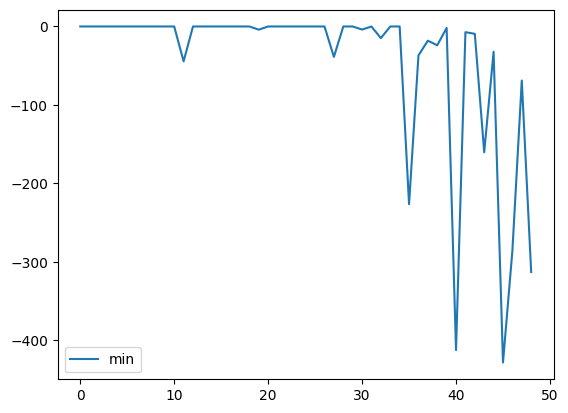

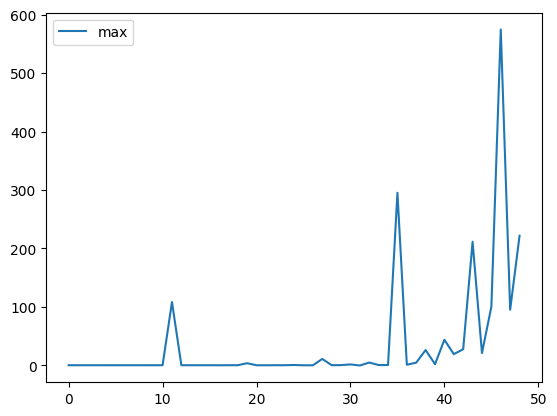

party: 3


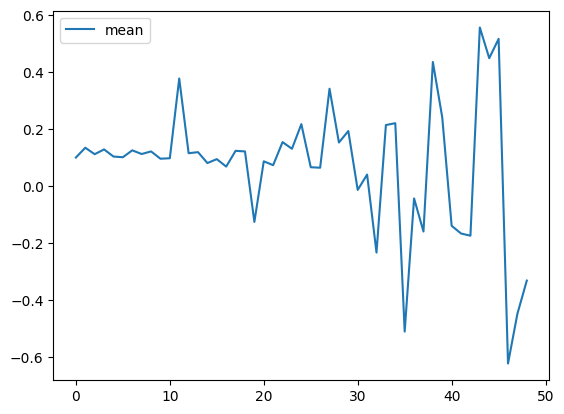

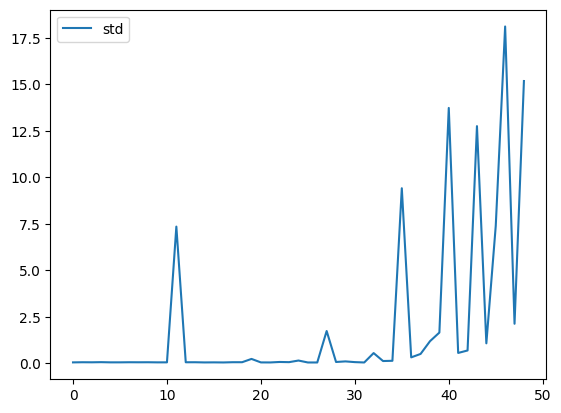

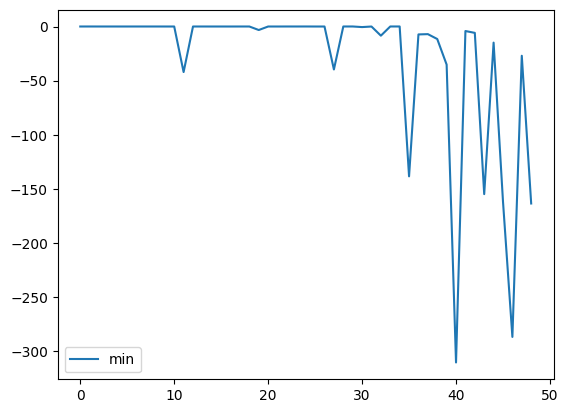

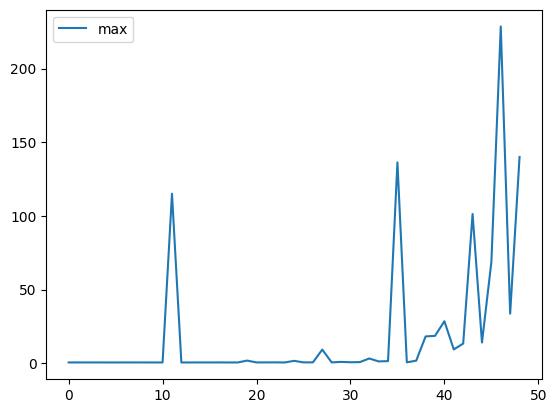

In [4]:
for _ in range(finetune_delta_distribution.shape[1]):
    print('party:', _)
    draw_data = []
    for i in range(len(finetune_delta_distribution)):
        distribution = finetune_delta_distribution[i,:,:,0]
        distribution = pd.DataFrame(distribution).T
        # print(i)
        # print(distribution.describe())
        # print(distribution.describe().loc['mean'][_])
        draw_data.append([distribution.describe().loc['mean'][_], distribution.describe().loc['std'][_], distribution.describe().loc['min'][_], distribution.describe().loc['max'][_]])
    #draw mean
    draw_data = np.array(draw_data)
    plt.plot(draw_data[:,0], label='mean')
    # plt.fill_between(range(len(draw_data)), draw_data[:,0]-draw_data[:,1], draw_data[:,0]+draw_data[:,1], alpha=0.3)
    plt.legend()
    plt.show()
    plt.plot(draw_data[:,1], label='std')
    plt.legend()
    plt.show()
    plt.plot(draw_data[:,2], label='min')
    plt.legend()
    plt.show()
    plt.plot(draw_data[:,3], label='max')
    plt.legend()
    plt.show()

In [242]:
for party in range(finetune_delta_distribution.shape[1]):
    print('party:', party)
    distribution6 = finetune_delta_distribution[0, party,:,:]
    print(pd.DataFrame(distribution6[index]).describe())
    print(pd.DataFrame(distribution6[non_index]).describe())

party: 0
                0           1
count  183.000000  183.000000
mean     0.101254    0.101254
std      0.019425    0.019425
min      0.041067    0.041067
25%      0.081133    0.081133
50%      0.102040    0.102040
75%      0.112842    0.112842
max      0.154986    0.154986
                  0             1
count  33970.000000  33970.000000
mean       0.114383      0.114383
std        0.021528      0.021528
min        0.040868      0.040868
25%        0.109764      0.109764
50%        0.118127      0.118127
75%        0.120933      0.120932
max        0.167432      0.167432
party: 1
                0           1
count  183.000000  183.000000
mean     0.073698    0.073698
std      0.011010    0.011010
min      0.037619    0.037619
25%      0.075845    0.075845
50%      0.076521    0.076521
75%      0.078239    0.078239
max      0.082936    0.082936
                  0             1
count  33970.000000  33970.000000
mean       0.073791      0.073791
std        0.013796      0.013796


                 0             1             2             3             4   \
count  34153.000000  34153.000000  34153.000000  34153.000000  34153.000000   
mean       0.158989     -0.280773      0.046356     -0.013228      0.051745   
std        5.775232      2.443898      3.664745      1.688587      1.943555   
min     -998.972479   -207.487206   -419.047047    -19.221229    -94.606639   
25%        0.077111     -0.440664     -0.020089     -0.019776     -0.109665   
50%        0.176281     -0.162886      0.006391      0.004416     -0.014275   
75%        0.253493     -0.117863      0.017431      0.014360      0.203791   
max       74.319509    306.592128    249.868290    306.592128    306.592128   

                 5             6             7             8             9   \
count  34153.000000  34153.000000  34153.000000  34153.000000  34153.000000   
mean       0.049404      0.036710     -0.022972      0.001070      0.000791   
std       18.443526      0.461692      1.756065    

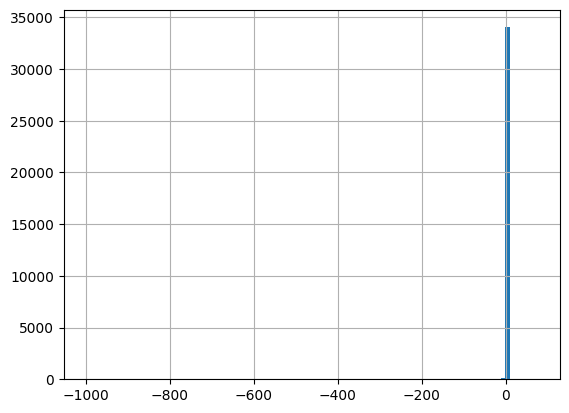

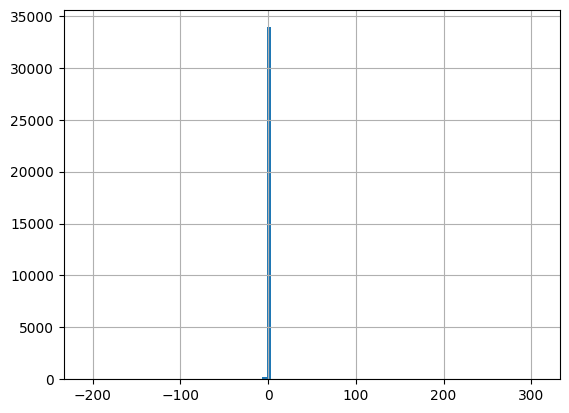

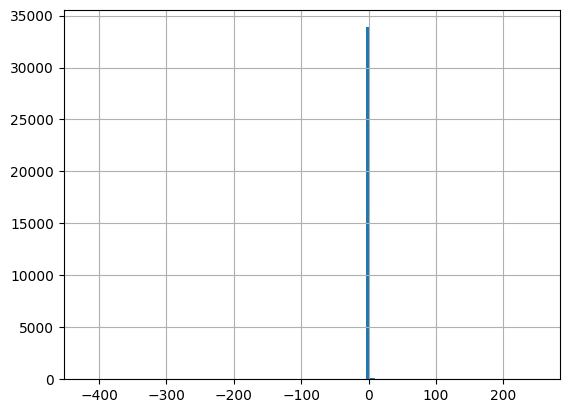

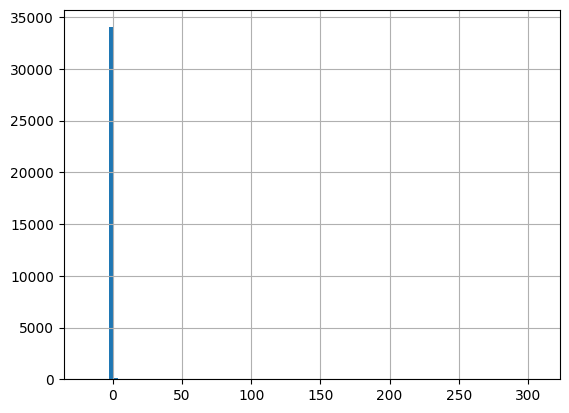

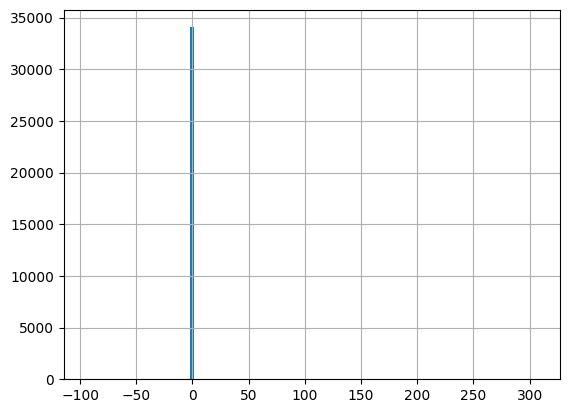

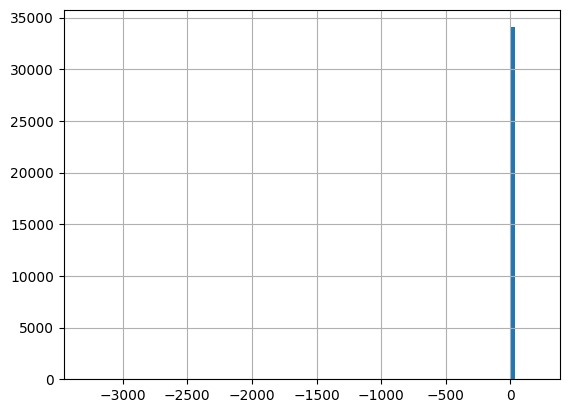

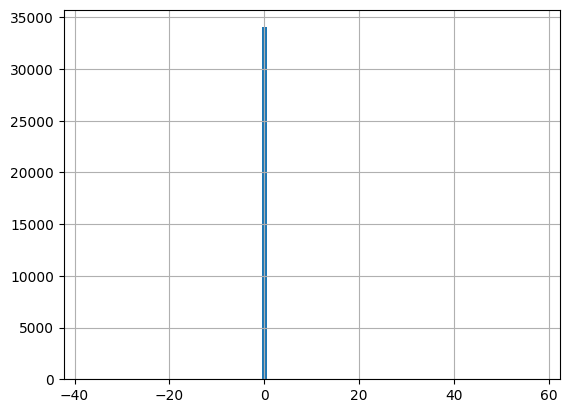

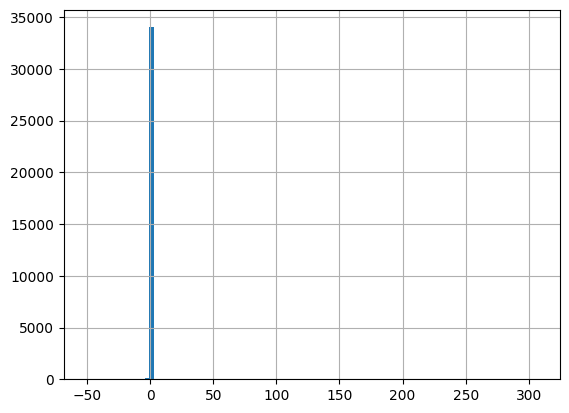

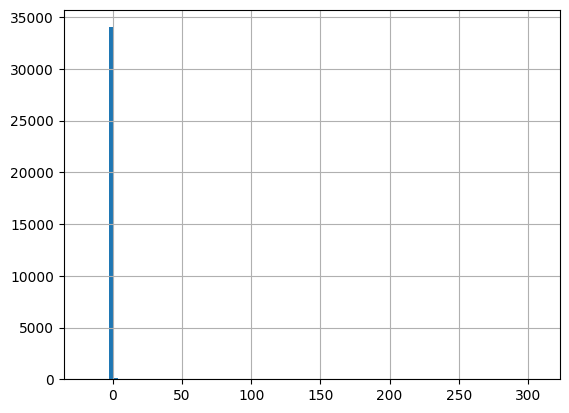

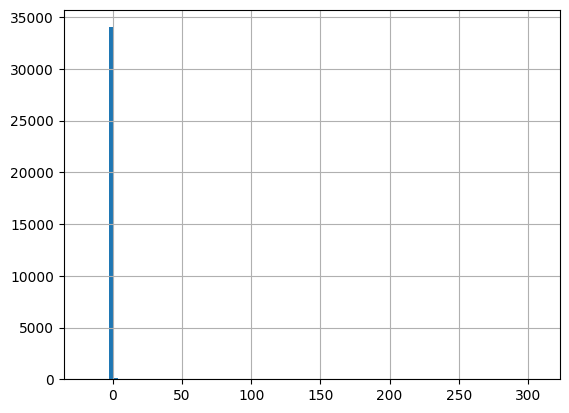

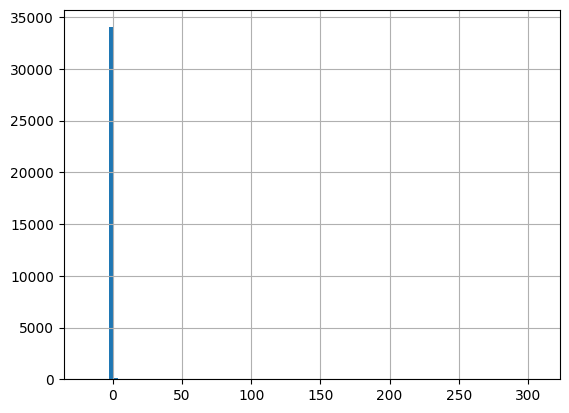

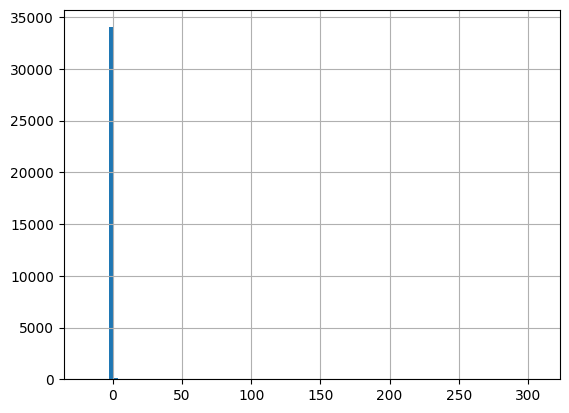

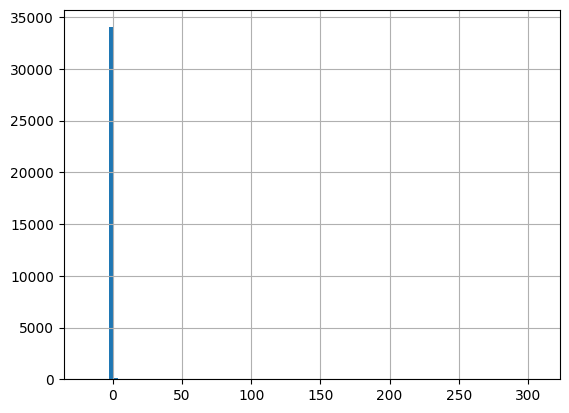

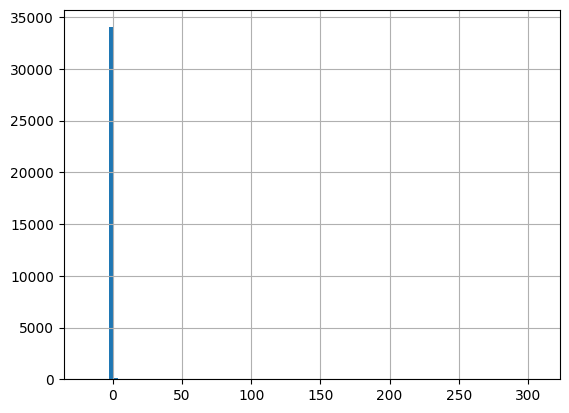

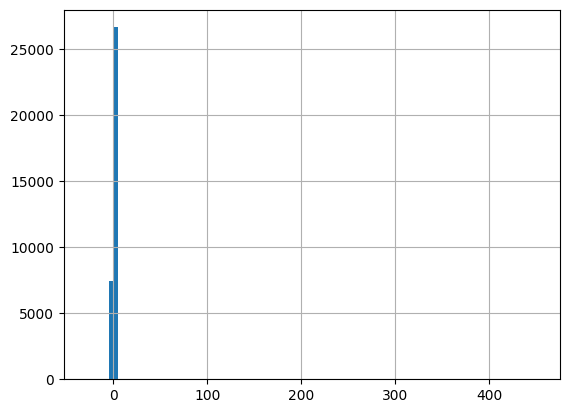

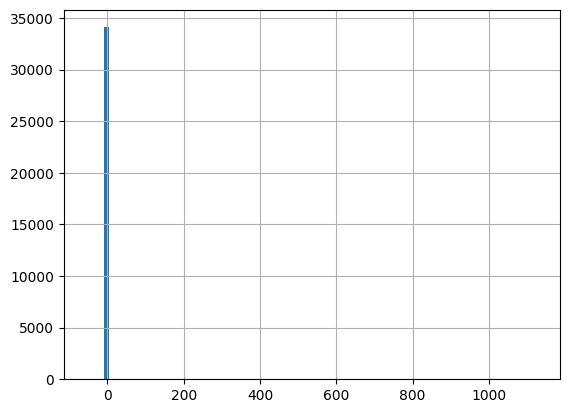

In [261]:
finetune_distribution1 = finetune_delta_distribution[0,:,:,0]
finetune_distribution19 = finetune_delta_distribution[6,:,:,0]
finetune_distribution_change = pd.DataFrame(finetune_distribution1 - finetune_distribution19).T
# # if any value in the distribution is large than 1, then the distribution is not valid, so set it to nan
# finetune_distribution_change = np.where(np.abs(finetune_distribution_change) > 1, np.nan, finetune_distribution_change)
# finetune_distribution_change = pd.DataFrame(finetune_distribution_change)
print(finetune_distribution_change.describe())
for i in range(finetune_distribution_change.shape[1]):
    finetune_distribution_change.iloc[:,i].hist(bins=100)
    plt.show()

                 0             1             2             3             4   \
count  34153.000000  34153.000000  34153.000000  34153.000000  34153.000000   
mean       0.104701      0.071544      0.056342      0.051857      0.074378   
std        0.017280      0.014655      0.019344      0.017362      0.024255   
min        0.040321      0.036026      0.034767      0.034828      0.036218   
25%        0.096991      0.066059      0.040882      0.040087      0.045511   
50%        0.106860      0.070906      0.043562      0.042209      0.078129   
75%        0.113021      0.083925      0.073329      0.062231      0.085534   
max        0.154190      0.105023      0.105413      0.102502      0.137310   

                 5             6             7             8             9   \
count  34153.000000  34153.000000  34153.000000  34153.000000  34153.000000   
mean       0.048591      0.091840      0.070355      0.041357      0.041325   
std        0.012169      0.017827      0.020123    

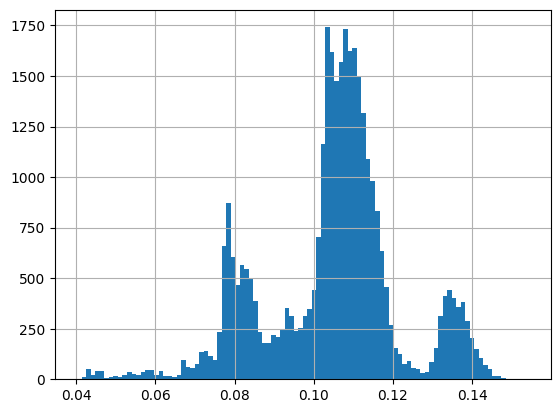

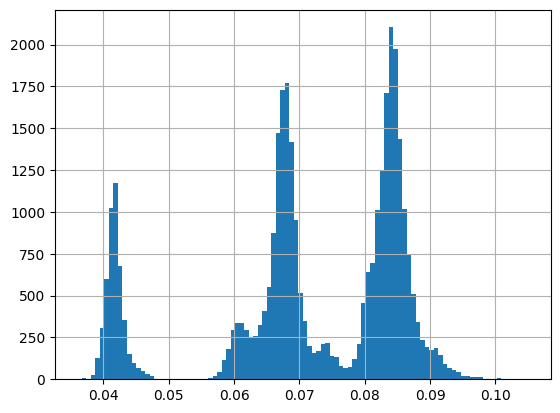

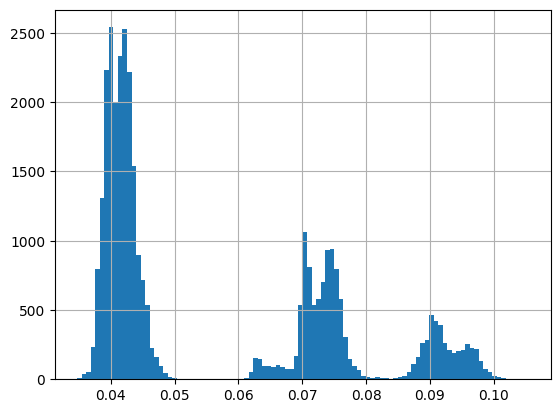

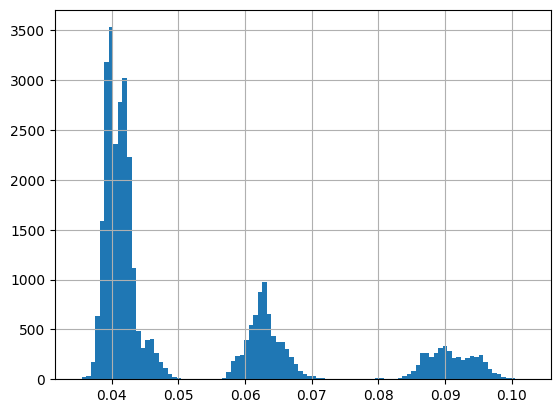

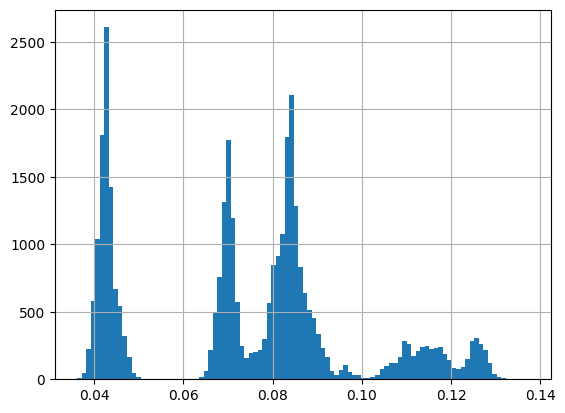

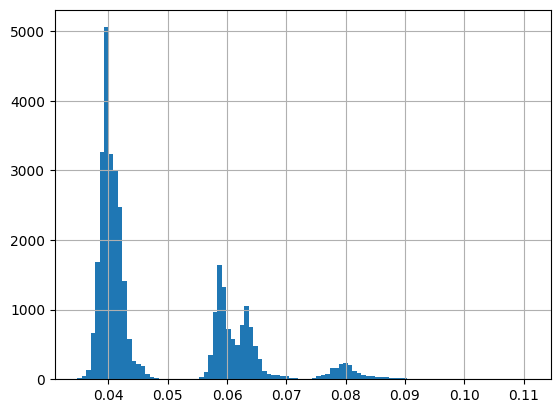

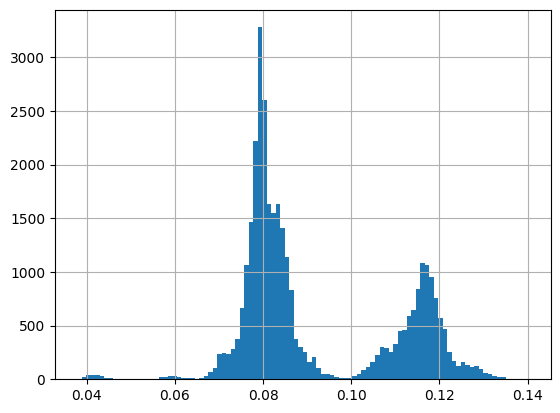

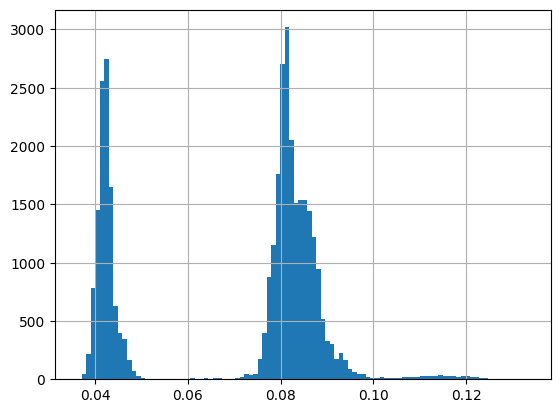

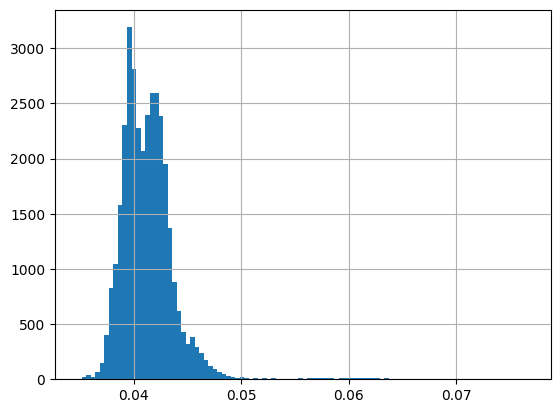

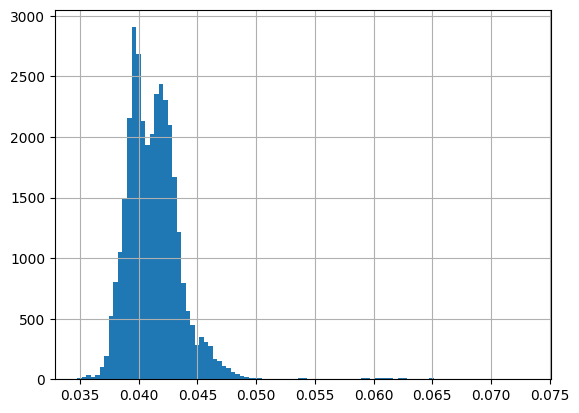

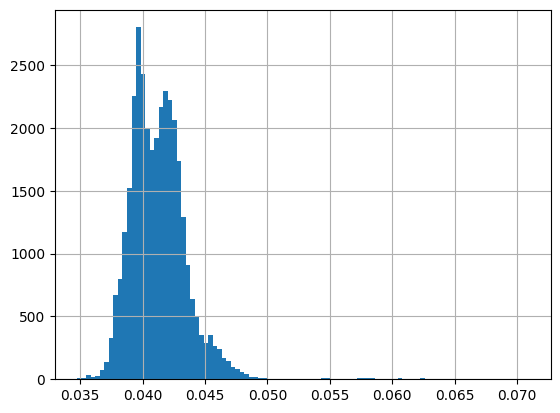

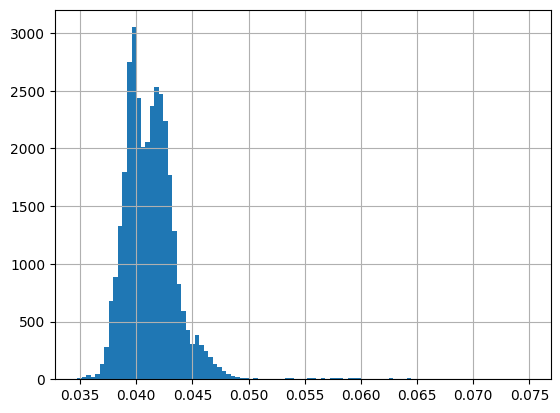

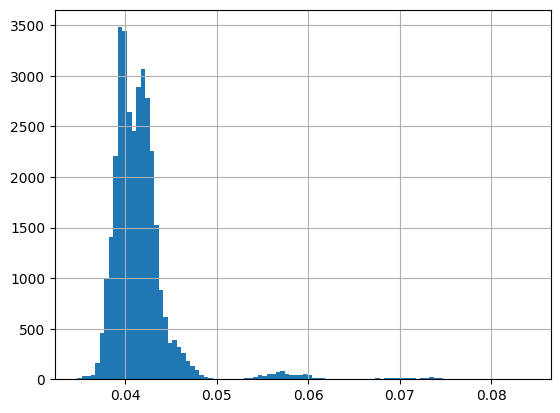

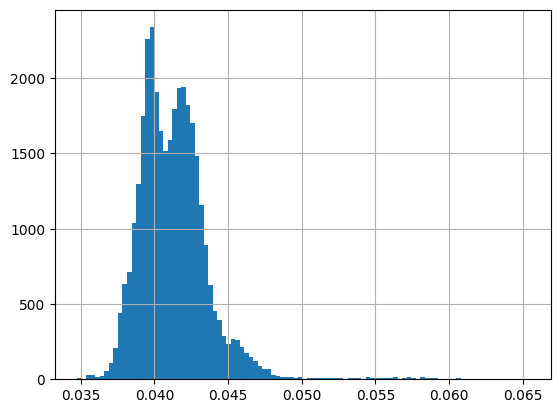

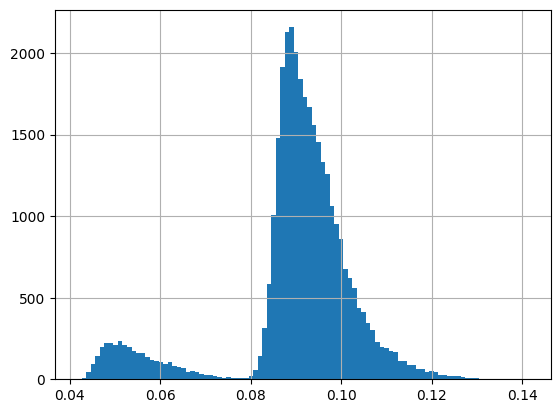

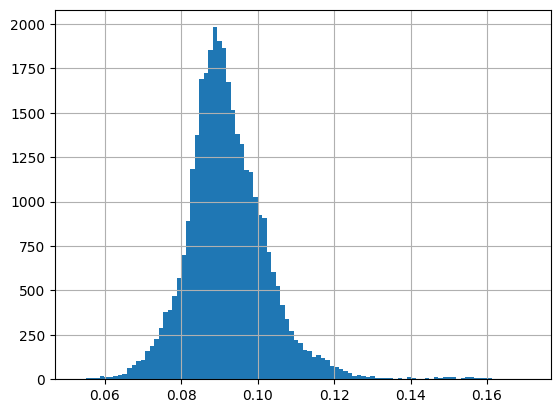

In [246]:
finetune_distribution1 = finetune_delta_distribution[0,:,:,0]
finetune_distribution2 = finetune_delta_distribution[1,:,:,0]
finetune_distribution3 = finetune_delta_distribution[2,:,:,0]
finetune_distribution4 = finetune_delta_distribution[3,:,:,0]
finetune_distribution5 = finetune_delta_distribution[4,:,:,0]
finetune_distribution = 1 / 5 * (finetune_distribution1 + finetune_distribution2 + finetune_distribution3 + finetune_distribution4 + finetune_distribution5)
finetune_distribution = pd.DataFrame(finetune_distribution).T
print(finetune_distribution.describe())
for i in range(finetune_distribution.shape[1]):
    finetune_distribution.iloc[:,i].hist(bins=100)
    plt.show()

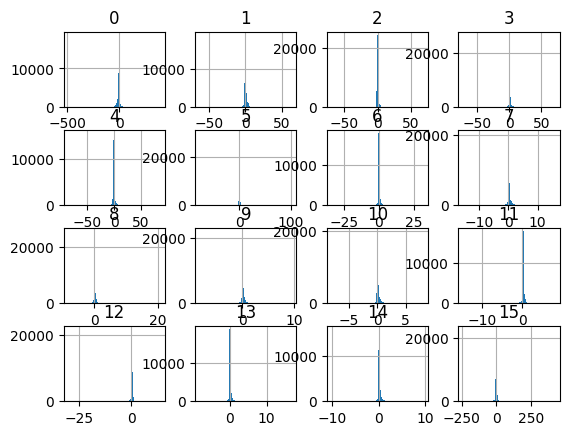

                 0             1             2             3             4   \
count  33960.000000  33960.000000  33960.000000  33960.000000  33960.000000   
mean      -4.934149      0.325970      0.401947      0.362115      0.123170   
std       24.405463      3.514567      3.189149      2.803066      3.137863   
min     -489.837946    -62.110273    -68.528053    -72.500146    -85.650266   
25%       -6.258996     -0.459818      0.010794      0.019919     -0.177690   
50%       -2.872572      0.101059      0.126055      0.118354      0.108977   
75%       -1.515432      0.576063      0.315770      0.406086      0.333529   
max      393.612242     63.543575     68.184178     71.127480     85.844361   

                 5             6             7             8             9   \
count  33960.000000  33960.000000  33960.000000  33960.000000  33960.000000   
mean       0.340596      0.277443      0.267112      0.153184      0.152486   
std        2.781222      1.285752      1.029117    

In [247]:
(finetune_distribution - distribution).hist(bins=100)
plt.show()
print((finetune_distribution - distribution).describe())

In [8]:
h = torch.load('exp_result/adult_income/trained_models/random_remove_0.01_features_Asynchronous_Unlearning/h_history.pkl')

h_delta_list = h['h_delta_list']
online_distribute_percent_list = h['online_distribute_percent_list']
remaining_distribute_percent_list = h['remaining_distribute_percent_list']
online_h_delta_list = h['online_h_delta_list']
overall_pred_list = h['overall_pred_list']
unlearning_clients_h_delta_list = h['unlearning_clients_h_delta_list']
overall_pred_list = [i.detach().cpu().numpy() for i in overall_pred_list]
# print shapes
print('h_delta_list:', np.array(h_delta_list).shape)
print('online_distribute_percent_list:', np.array(online_distribute_percent_list).shape)
print('remaining_distribute_percent_list:', np.array(remaining_distribute_percent_list).shape)
print('online_h_delta_list:', np.array(online_h_delta_list).shape)
print('overall_pred_list:', np.array(overall_pred_list).shape)
print('unlearning_clients_h_delta_list:', np.array(unlearning_clients_h_delta_list).shape)


h_delta_list: (11, 34153, 2)
online_distribute_percent_list: (11, 34153, 2)
remaining_distribute_percent_list: (11, 34153, 2)
online_h_delta_list: (11, 34153, 2)
overall_pred_list: (11, 34153, 2)
unlearning_clients_h_delta_list: (11, 34153, 2)


                  0             1
count  34153.000000  34153.000000
mean       0.194853     -0.097857
std        0.196328     18.056871
min      -23.191805    -20.031764
25%        0.154894     -0.238663
50%        0.195352     -0.195359
75%        0.238656     -0.154899
max       22.274508   3336.699872


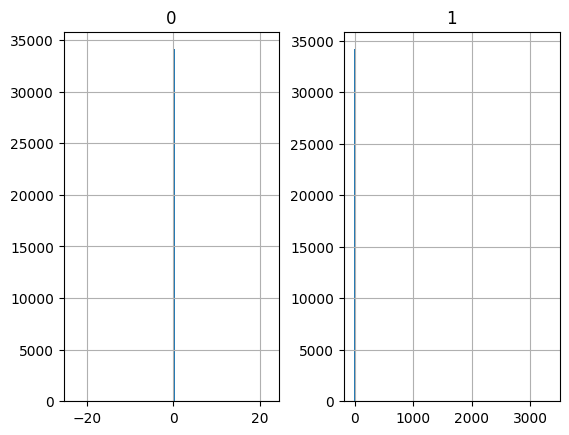

                  0             1
count  34153.000000  34153.000000
mean       2.260109     -0.032255
std        1.899672      1.870207
min      -15.643016     -6.052951
25%        1.028128     -1.021352
50%        2.671323     -0.126041
75%        3.600015      0.830276
max        7.430444     18.130808
                  0             1
count  34153.000000  34153.000000
mean       2.065257      0.065602
std        1.905062     18.147867
min      -20.684371  -3335.818818
25%        0.829324     -0.823123
50%        2.467687      0.069412
75%        3.400294      1.027430
max       24.438298     19.913004


In [9]:
finetune_overall_pred = finetune_pred[0,:,:,:].numpy().sum(axis=0)
delta_overall_pred = finetune_overall_pred - np.array(overall_pred_list[0])
delta_overall_pred = pd.DataFrame(delta_overall_pred)
print(delta_overall_pred.describe())
delta_overall_pred.hist(bins=100)
plt.show()
print(pd.DataFrame(finetune_overall_pred).describe())
print(pd.DataFrame(np.array(overall_pred_list[0])).describe())

                  0             1
count  34153.000000  34153.000000
mean       0.034978      0.062024
std        0.187525     18.056764
min      -23.349577    -19.779060
25%        0.027759     -0.041028
50%        0.035327     -0.035326
75%        0.041027     -0.027756
max       22.200078   3336.857651


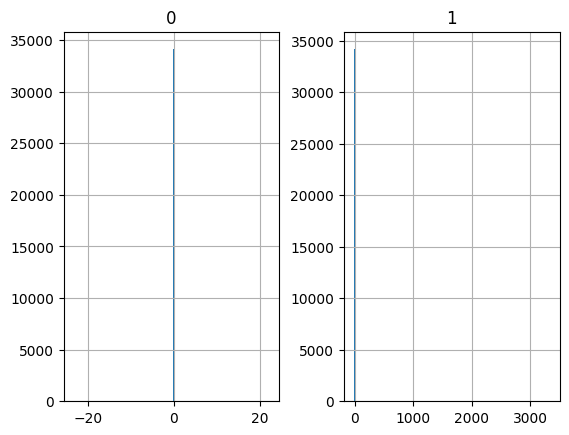

                  0             1
count  34153.000000  34153.000000
mean       0.035080     -0.035080
std        0.007189      0.007189
min        0.015698     -0.049848
25%        0.029278     -0.040837
50%        0.036347     -0.036347
75%        0.040837     -0.029278
max        0.049848     -0.015698
                  0             1
count  34153.000000  34153.000000
mean       0.000102     -0.097104
std        0.187387     18.056734
min      -22.159803  -3336.887331
25%       -0.000960     -0.001326
50%        0.000222     -0.000224
75%        0.001323      0.000962
max       23.379258     19.754299


In [10]:
finetune_pred_delta = finetune_delta[0].sum(axis=0)
delta_pred_delta = finetune_pred_delta - np.array(h_delta_list[0])
delta_pred_delta = pd.DataFrame(delta_pred_delta)
print(delta_pred_delta.describe())
delta_pred_delta.hist(bins=100)
plt.show()
print(pd.DataFrame(finetune_pred_delta).describe())
print(pd.DataFrame(np.array(h_delta_list[0])).describe())

In [79]:
# saved = torch.load('exp_result/adult_income/trained_models/random_remove_0.01_features_Batch_Unlearning/h_history.pkl')
saved = torch.load('exp_result/adult_income/trained_models/random_remove_0.01_features_VFUFR/h_history.pkl')

h_delta_list = saved['h_delta_list']
online_distribute_percent_list = saved['online_distribute_percent_list']
remaining_distribute_percent_list = saved['remaining_distribute_percent_list']
online_h_delta_list = saved['online_h_delta_list']
overall_pred_list = saved['overall_pred_list']
unlearning_clients_h_delta_list = saved['unlearning_clients_h_delta_list']

In [12]:
df_delta_by_percent = pd.DataFrame((np.array(online_distribute_percent_list) / np.array(remaining_distribute_percent_list))[0])
print(df_delta_by_percent.describe())

             0        1
count  34153.0  34153.0
mean       1.0      1.0
std        0.0      0.0
min        1.0      1.0
25%        1.0      1.0
50%        1.0      1.0
75%        1.0      1.0
max        1.0      1.0


In [13]:
df_delta_by_float = pd.DataFrame((np.array(online_h_delta_list) - np.array(h_delta_list) + np.array(unlearning_clients_h_delta_list))[0])
print(df_delta_by_float.describe())

                  0             1
count  3.415300e+04  3.415300e+04
mean  -2.844392e-21 -1.219025e-21
std    6.492525e-19  6.377556e-19
min   -6.938894e-18 -6.938894e-18
25%    0.000000e+00  0.000000e+00
50%    0.000000e+00  0.000000e+00
75%    0.000000e+00  0.000000e+00
max    6.938894e-18  6.938894e-18


In [82]:
overall_pred_list[199]

tensor([[ 2.2802,  3.0630],
        [ 4.3074,  2.0028],
        [ 2.5153, -2.3479],
        ...,
        [ 2.2007,  0.8294],
        [ 0.5684,  0.6403],
        [ 3.0426, -0.5161]], device='cuda:0', dtype=torch.float64,
       requires_grad=True)

In [83]:
finetune_pred.sum(axis=1)[199]

tensor([[ 2.2802,  3.0630],
        [ 4.3074,  2.0028],
        [ 2.5153, -2.3479],
        ...,
        [ 2.2007,  0.8294],
        [ 0.5684,  0.6403],
        [ 3.0426, -0.5161]], dtype=torch.float64)

In [85]:
(finetune_pred.sum(axis=1)[199].numpy() - overall_pred_list[199].detach().cpu().numpy())

array([[0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       ...,
       [9.31322575e-09, 1.49011612e-08],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00]])

In [273]:
delta_overall_pred

array([[ 0.11816153, -0.11816649],
       [ 0.11816153, -0.11816649],
       [ 0.11816153, -0.11816649],
       ...,
       [ 0.13523881,  0.51081556],
       [ 0.11816153, -0.11816649],
       [ 0.11816153, -0.11816649]])

In [272]:
delta_overall_pred1 = delta_overall_pred - delta_overall_pred[0]
changed = pd.DataFrame(delta_overall_pred1 / overall_pred_list[0].cpu().detach().numpy())
print(changed.describe())
# count the number of changed data not equal to 0
changed[changed != 0].count() / changed.count()

                  0             1
count  34153.000000  34153.000000
mean       0.000192      0.219779
std        0.147483     30.033907
min      -21.449869   -929.669981
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.000000      0.000000
max        3.061893   5241.884011


0    0.163119
1    0.163119
dtype: float64

In [267]:
overall_pred_list[0]

tensor([[ 2.3480,  2.9951],
        [ 4.3490,  1.9612],
        [ 2.5003, -2.3329],
        ...,
        [ 2.2630,  0.7671],
        [ 0.6030,  0.6057],
        [ 3.0467, -0.5202]], device='cuda:0', dtype=torch.float64,
       requires_grad=True)

In [17]:
finetune_pred.sum(axis=1)[0]

tensor([[ 2.4444,  2.8988],
        [ 4.4424,  1.8678],
        [ 2.5920, -2.4246],
        ...,
        [ 2.3860,  0.6440],
        [ 0.7359,  0.4727],
        [ 3.1749, -0.6485]])